<a href="https://colab.research.google.com/github/ayuti/Machine-Learning/blob/main/load_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras.layers import Activation, Dense
from keras.layers import Dropout





In [2]:
df = pd.read_excel(r'nov_category_nsr.xlsx')

df.head(5)


,PSTG. DATE,Category,NSR
0,2021-04-02,HCV,20.014434
1,2021-04-02,HCV,25.567178
2,2021-04-02,HCV,25.567178
3,2021-04-02,HCV,25.833700
4,2021-04-02,HCV,25.373057


In [3]:
df['NSR'] = df['NSR'].astype(int)
df=df.set_index('PSTG. DATE')

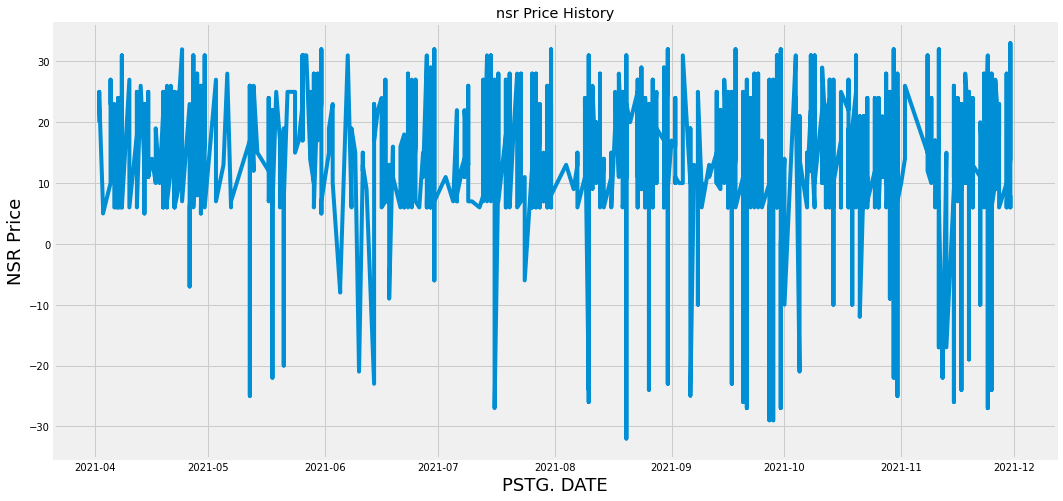

In [4]:
plt.figure(figsize=(16,8))
plt.title('nsr Price History')
plt.plot(df['NSR'])
#We label the axis
plt.xlabel('PSTG. DATE', fontsize=18)
plt.ylabel('NSR Price', fontsize=18)
#We show the plot
plt.show()


In [5]:
Load=df.query('Category=="Load"')
Load


,Category,NSR
PSTG. DATE,,
2021-10-07,Load,6
2021-10-07,Load,6
2021-10-07,Load,6
2021-10-09,Load,6
2021-10-09,Load,6
...,...,...
2021-11-30,Load,7
2021-11-30,Load,7
2021-11-30,Load,7


In [6]:

data = Load.filter(['NSR'])

#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.8 )

training_data_len


147

In [7]:
#data

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [9]:
#Create the training data set 
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
train_data

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [10]:
#Split the data into x_train and y_train data sets
x_train = []
y_train = []


In [11]:
#We create a loop
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #Will conaint 60 values (0-59)
  y_train.append(train_data[i, 0]) #Will contain the 61th value (60)
  if i <= 60:
    print(x_train)
    print(y_train)
    print()


[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1.])]
[0.0]



In [12]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



(87, 60, 1)

In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#model.add(Dropout(0.2))

model.add(LSTM(50 ,return_sequences=False))
#model.add(Dropout(0.2))

model.add(Dense(25))
model.add(Dense(1))


In [15]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=900)


Epoch 1/900
3/3 [==============================] - 4s 70ms/step - loss: 0.2944
Epoch 2/900
3/3 [==============================] - 0s 59ms/step - loss: 0.2325
Epoch 3/900
3/3 [==============================] - 0s 64ms/step - loss: 0.2358
Epoch 4/900
3/3 [==============================] - 0s 61ms/step - loss: 0.2317
Epoch 5/900
3/3 [==============================] - 0s 60ms/step - loss: 0.2247
Epoch 6/900
3/3 [==============================] - 0s 67ms/step - loss: 0.2266
Epoch 7/900
3/3 [==============================] - 0s 63ms/step - loss: 0.2259
Epoch 8/900
3/3 [==============================] - 0s 61ms/step - loss: 0.2238
Epoch 9/900
3/3 [==============================] - 0s 64ms/step - loss: 0.2224
Epoch 10/900
3/3 [==============================] - 0s 67ms/step - loss: 0.2212
Epoch 11/900
3/3 [==============================] - 0s 59ms/step - loss: 0.2212
Epoch 12/900
3/3 [==============================] - 0s 61ms/step - loss: 0.2219
Epoch 13/900
3/3 [==============================]

In [17]:
#Create the testing data set

test_data = scaled_data[training_data_len - 60:]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [18]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [19]:
len(x_test)

36

In [20]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [21]:
#Get the model's predicted price values for the x_test data set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions


array([[6.033294 ],
       [6.8136754],
       [6.809335 ],
       [5.7619696],
       [6.3087435],
       [6.334114 ],
       [6.002268 ],
       [5.9751625],
       [6.224606 ],
       [5.984681 ],
       [6.5683804],
       [6.3079305],
       [6.602203 ],
       [6.7345743],
       [7.095052 ],
       [6.631803 ],
       [6.470875 ],
       [6.7632046],
       [6.5179806],
       [6.4884915],
       [6.307388 ],
       [6.813719 ],
       [7.00077  ],
       [7.2488422],
       [8.193185 ],
       [6.8715234],
       [6.753753 ],
       [6.2451973],
       [6.2651935],
       [6.3543005],
       [6.469727 ],
       [6.6584663],
       [7.041485 ],
       [7.0299997],
       [6.643675 ],
       [6.1034307]], dtype=float32)

In [22]:
#Evaluate model (get the root mean quared error (RMSE))
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse


0.06747219297620985

In [23]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


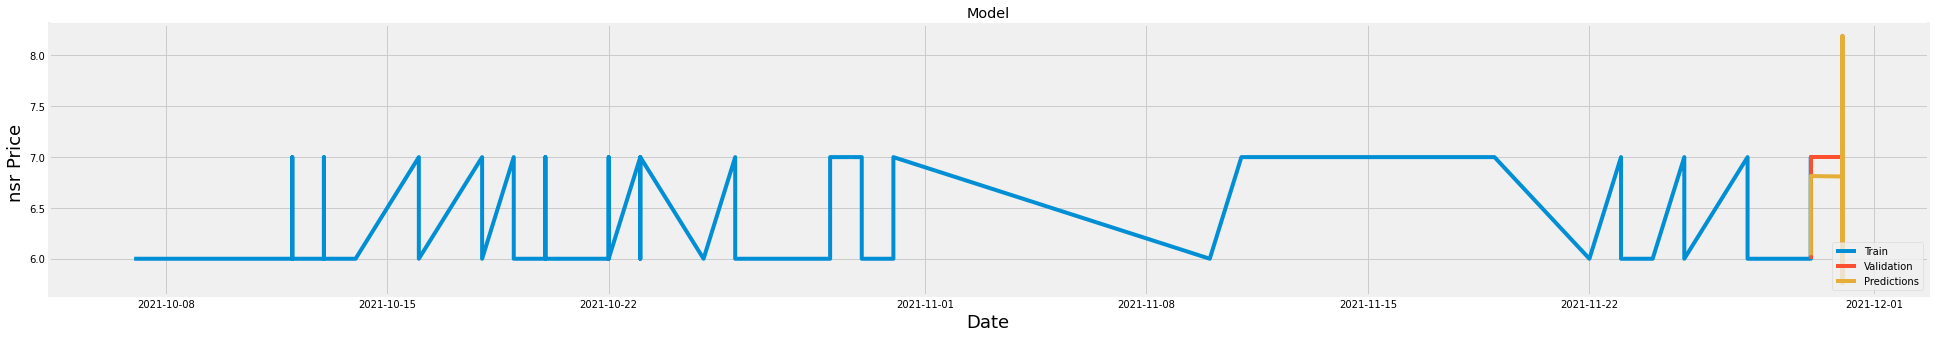

In [24]:
#Visualize the data
plt.figure(figsize=(30,5))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('nsr Price ', fontsize=18)
plt.plot(train['NSR'])
plt.plot(valid[['NSR', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()


In [25]:
X_FUTURE = 65
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
  curr_prediction = model.predict(np.array([last]))
  print(curr_prediction)
  last = np.concatenate([last[1:], curr_prediction])
  predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = scaler.inverse_transform([predictions])[0]
print(predictions)


[[0.10343082]]
[[-0.18092795]]
[[-0.15770951]]
[[0.06480303]]
[[0.08997013]]
[[0.10859922]]
[[-0.03232144]]
[[-0.12800574]]
[[0.29239568]]
[[0.36223042]]
[[0.55627763]]
[[0.3450768]]
[[0.18057418]]
[[0.511226]]
[[0.37093374]]
[[-0.48618072]]
[[0.75979346]]
[[0.24062708]]
[[-0.00284756]]
[[0.8079284]]
[[-0.1704325]]
[[-0.02278469]]
[[0.07020059]]
[[-0.15718111]]
[[1.9617658]]
[[-0.52491355]]
[[-0.15502296]]
[[1.4871067]]
[[0.38023388]]
[[0.30731404]]
[[0.5780974]]
[[0.6876476]]
[[0.49927995]]
[[0.13085149]]
[[-0.05933516]]
[[-0.19698386]]
[[0.17789604]]
[[0.05847367]]
[[0.36390433]]
[[0.02813949]]
[[0.5203882]]
[[0.11140466]]
[[0.02960242]]
[[0.6297763]]
[[0.7818505]]
[[0.10963321]]
[[0.0747673]]
[[0.17830922]]
[[0.10620812]]
[[0.0254816]]
[[0.8726242]]
[[0.7668518]]
[[0.31935]]
[[0.5762495]]
[[0.84675175]]
[[0.4831881]]
[[1.1972508]]
[[0.5877522]]
[[0.98761266]]
[[1.0084965]]
[[0.87994903]]
[[0.8961181]]
[[0.67768836]]
[[0.14023563]]
[[-0.13047403]]
[6.10343082 5.81907205 5.84229049 6.

In [26]:
import datetime
from datetime import timedelta
dicts = []
curr_date = data.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")


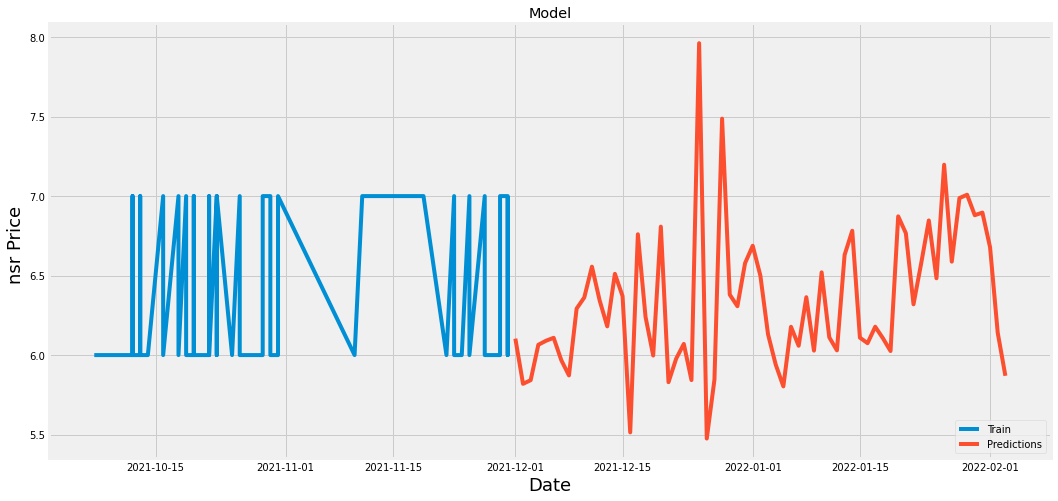

In [27]:
#Plot the data
train = data
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('nsr Price ', fontsize=18)
plt.plot(train['NSR'])
plt.plot(new_data['Predictions'])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()

In [29]:
import pandas as pd

## convert your array into a dataframe
df = pd.DataFrame (predictions)

## save to xlsx file

filepath = 'load.xlsx'

df.to_excel(filepath, index=False)